In [1]:
from datetime import datetime
import numpy as np
from numpy import expand_dims
from numpy.random import randint
from tensorflow.keras.datasets.cifar10 import load_data
import tensorflow as tf
import sys
sys.path.append("..")
from src.models.c_dcgan import GANColor
from src.models.train_helpers import CGanTrainer
import matplotlib.pyplot as plt

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

%matplotlib inline


def load_real_samples():
    (train_X, train_y), (_, _) = load_data()
    x = train_X.astype('float32')
    x = (x - 127.5) / 127.5
    return [x, train_y]


def generate_real_samples(dataset, n_samples):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    images, labels = images[ix], labels[ix]
    return [images, labels]


# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, callbacks, n_epochs=30, n_batch=128, model_name='generator_cifar.h5'):

    logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    file_writer = tf.summary.create_file_writer(logdir + "/metrics")

    trainer = CGanTrainer(d_model, g_model, gan_model, batch_size=n_batch, n_classes=10, noise_dim=latent_dim)
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    callbacks.on_train_begin()
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            # callback.on_batch_begin(i)
            [x_real, labels_real] = generate_real_samples(dataset, half_batch)
            real_loss, fake_loss, gan_loss = trainer.train_step(x_real, labels_real, i)
            # callbacks.on_batch_end(
            #     i,
            #     logs={'real_loss': real_loss, 'fake_loss': fake_loss, 'gan_loss': gan_loss})

        with file_writer.as_default():
            tf.summary.scalar('real loss', data=real_loss, step=i)
            tf.summary.scalar('fake loss', data=fake_loss, step=i)
            tf.summary.scalar('gan loss', data=gan_loss, step=i)
            plot_buf = trainer.create_fig(i)
            image = tf.image.decode_png(plot_buf.getvalue(), channels=4)
            image = tf.expand_dims(image, 0)
            tf.summary.image('plot', data=image, step=i)
        
    
    print('EPOCH:', 0)
    # callbacks.on_train_end('_')
    g_model.save('../models/' + model_name)


In [2]:
latent_dim = 100
gan = GANColor((32, 32, 3))
d_model = gan.discriminator
g_model = gan.generator
gan_model = gan.combined
dataset = load_real_samples()

log_path = './logs'
callback = tf.keras.callbacks.TensorBoard(log_path)
callback.set_model(gan_model)

# train model

170500096/170498071 [==============================] - 76s 0us/step


0 0.68714917 0.6962936 0.6184145
0 0.61160076 0.70408845 0.44173998
0 0.5317435 0.7195849 0.2789569
0 0.4756405 0.73972094 0.19760667
0 0.41021985 0.7607491 0.1621541
0 0.36695334 0.77772284 0.16231161
0 0.3044255 0.7781761 0.19103417
0 0.24865663 0.7622881 0.2546278
0 0.19957754 0.7408753 0.368875
0 0.18217036 0.7204255 0.5335039
0 0.14047119 0.7077515 0.7132218
0 0.12105368 0.72285473 1.0443275
0 0.124009684 0.6810398 1.6474305
0 0.107216105 0.6588959 1.1390761
0 0.10069746 0.8043878 1.2442067
0 0.10518189 0.65539217 1.9229449
0 0.10976724 0.46350127 2.9453936
0 0.12414223 0.2745607 3.7873373
0 0.114798196 0.18485612 4.2788963
0 0.11878231 0.1444039 3.957969
0 0.1117977 0.14361103 5.184539
0 0.090898916 0.057893142 5.986351
0 0.11314583 0.06840589 5.336359
0 0.1174642 0.14672926 6.1612797
0 0.18403266 0.087693974 5.849045
0 0.13265145 0.16785821 5.9384203
0 0.0971453 0.10535158 5.9900713
0 0.18652101 0.10094958 6.106582
0 0.13557845 0.040579986 5.495179
0 0.1558831 0.026686111 5.2517

0 0.401316 0.6454544 1.4161353
0 0.3845633 0.69004375 1.4809023
0 0.39674297 1.019601 1.2080742
0 0.27611697 1.2089667 1.2515368
0 0.45299333 0.8813063 1.3049209
0 0.7192191 0.8789463 1.4126009
0 0.8684877 0.893415 1.1700895
0 1.0370791 0.91009265 1.0973856
0 0.8086628 0.9424988 0.9346407
0 0.70279765 0.89630705 0.8670559
0 0.507178 0.8914131 0.90131545
0 0.46720594 0.86686623 1.0368352
0 0.48819768 0.8708272 1.1472858
0 0.36768287 0.92231095 0.7305355
0 0.45147902 0.82378733 0.9341884
0 0.53912526 0.7598342 1.0085187
0 0.4430698 0.74623346 1.0685986
0 0.4633667 0.6208574 1.3795207
0 0.3435739 0.6522762 1.1876384
0 0.34588265 0.68653464 1.2235662
0 0.31989014 0.6569198 0.98682374
0 0.33816296 0.8195704 0.8904373
0 0.29962033 0.86298543 0.7448189
0 0.2998061 0.80424744 0.8968518
0 0.30364826 0.72685385 1.0983882
0 0.36646488 0.8046063 1.0615962
0 0.34826595 0.7544144 1.1524265
0 0.5243758 0.81591994 1.0834308
0 0.45608607 0.7477088 1.193645
0 0.50689006 0.7686063 1.1956042
0 0.46210337 

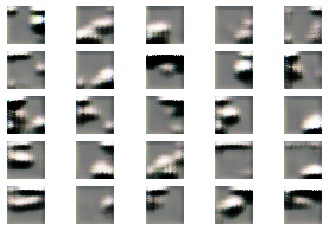

1 0.5107987 0.6176341 1.0137165
1 0.45416835 0.83899397 1.0061727
1 0.44004393 0.7371044 1.0991553
1 0.49986476 0.6651361 0.95871234
1 0.5293121 0.63124233 1.0372747
1 0.6352812 0.7336814 1.1117468
1 0.6032584 0.71273136 1.1126449
1 0.518537 0.6191193 1.1339293
1 0.41277707 0.5269784 1.1583958
1 0.5095519 0.61571896 1.2839041
1 0.52722967 0.50942373 1.1032037
1 0.494407 0.53798294 1.165534
1 0.5426624 0.63211226 1.1106731
1 0.5230137 0.6789139 1.1480976
1 0.5488037 0.6909709 1.1375529
1 0.67839307 0.70581555 1.1939381
1 0.75164413 0.6292721 1.0564716
1 0.5230385 0.6409272 1.1512212
1 0.7077094 0.5671917 1.1902202
1 0.70083916 0.6879875 1.1258173
1 0.5699538 0.5672464 1.2082441
1 0.82497275 0.6090677 1.0974677
1 0.67281926 0.6374531 1.0786251
1 0.54506296 0.53579533 1.2166643
1 0.5761837 0.44930312 1.2693539
1 0.68871 0.52647454 1.3140159
1 0.5229498 0.43708903 1.2751265
1 0.56924415 0.5074574 1.1090856
1 0.7069968 0.65332097 0.9427885
1 0.6022693 0.6964055 0.8173906
1 0.71535945 0.7607

1 0.74399257 0.70121634 1.1189659
1 0.75187045 0.5062532 1.2223134
1 0.7383409 0.52369946 1.3600512
1 0.86114484 0.5308778 1.4159673
1 0.8157153 0.53245735 1.3820829
1 0.7348844 0.47061563 1.5233971
1 0.6587109 0.35860252 1.5284257
1 0.66617113 0.49676234 1.4738564
1 0.8276273 0.39731348 1.5676144
1 0.8219044 0.404539 1.3328143
1 0.73866343 0.5035329 1.1781268
1 0.6627298 0.51303405 1.1483146
1 0.68741167 0.44008058 1.1844809
1 0.60205555 0.4941948 1.1129274
1 0.61671126 0.4929213 1.0570426
1 0.631766 0.45802844 1.0042856
1 0.5619997 0.5643815 1.0714545
1 0.5612954 0.5119759 0.9871668
1 0.63203263 0.52541304 0.8601369
1 0.47542962 0.55363023 0.8764355
1 0.46167535 0.5702331 0.84102213
1 0.46197352 0.56374 0.88900244
1 0.48228246 0.58377117 0.84566927
1 0.40255204 0.484464 0.80260706
1 0.44729242 0.59362483 0.79991615
1 0.34531114 0.5949341 0.75374293
1 0.37104532 0.6228626 0.78872
1 0.3308972 0.58076704 0.7897525
1 0.4492895 0.53057706 0.724002
1 0.41904214 0.5883291 0.6910774
1 0.3912

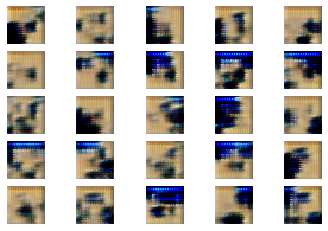

2 0.45925358 0.6981373 1.1224444
2 0.49945962 0.6085942 1.7074143
2 0.5979487 0.3907996 2.1127849
2 0.6744178 0.30945784 1.8515222
2 0.60513234 0.37384054 1.902642
2 0.7206384 0.4133271 1.642271
2 0.67762494 0.46616822 1.3361833
2 0.4185346 0.37306383 1.4518235
2 0.43343392 0.42613557 1.588947
2 0.46073538 0.39106673 1.4977193
2 0.4078352 0.36417687 1.5526532
2 0.4607705 0.34285474 1.5221705
2 0.62256 0.36975265 1.4210689
2 0.32321426 0.35123456 1.4517833
2 0.34144595 0.4384752 1.2415086
2 0.44200835 0.53373694 1.0726063
2 0.40352663 0.5206986 1.1360402
2 0.45918143 0.47142953 1.006685
2 0.42310232 0.51308686 0.88260573
2 0.40065992 0.64686036 0.78699064
2 0.5621818 0.73327833 0.64767057
2 0.5209113 0.842108 0.6700417
2 0.5536841 0.7209294 0.7694777
2 0.72560805 0.6766746 0.8938339
2 0.72819704 0.65264595 0.9227159
2 0.7263411 0.5589385 1.0751289
2 0.79354584 0.6181047 1.1535312
2 0.8410031 0.5458643 1.3401486
2 0.83623695 0.4343763 1.3548019
2 0.8078256 0.50070053 1.3899333
2 0.752574

2 0.4943616 0.62727296 0.49178055
2 0.5038215 0.6843671 0.46589893
2 0.53133166 0.8262741 0.5109879
2 0.45024285 0.86004496 0.5253037
2 0.54832935 0.9482837 0.40416273
2 0.54465926 0.96463525 0.43139154
2 0.59264386 1.070675 0.47158694
2 0.50040615 1.1093473 0.48123035
2 0.63963264 1.2035606 0.5521788
2 0.65175223 1.0526352 0.66230667
2 0.65425783 0.8455303 0.86481196
2 0.71621144 0.56342494 1.1841894
2 0.6273993 0.22559881 2.267483
2 0.5574856 0.50880593 1.2342371
2 0.53059125 0.6056776 1.1433412
2 0.5791996 0.49317205 1.2617157
2 0.5756403 0.53736377 1.2350545
2 0.650468 0.49977404 1.216134
2 0.5422291 0.47866553 1.3166251
2 0.6626755 0.48491198 1.263931
2 0.5977578 0.5089016 1.2455845
2 0.7150866 0.5803898 1.1200559
2 0.67268276 0.6684735 0.94364953
2 0.6994902 0.6570543 0.93109787
2 0.81258065 0.6405568 0.9321561
2 0.8221415 0.5343602 1.0362713
2 0.8976602 0.58405876 1.0260832
2 0.83968973 0.5494428 1.0892965
2 0.9994453 0.59634256 1.0894375
2 0.7205497 0.5418138 1.2307677
2 0.7921

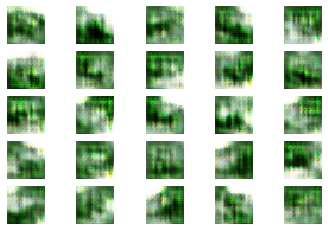

3 0.69663244 0.6336309 1.18158
3 0.7192155 0.5418297 1.1975707
3 0.6812302 0.48983496 1.1990724
3 0.7602211 0.50734854 1.0753164
3 0.6026356 0.5640248 1.0024724
3 0.61140275 0.5483422 0.9060783
3 0.6980379 0.55799395 0.87641996
3 0.70396173 0.6174301 0.84635365
3 0.7187481 0.59590214 0.8862736
3 0.6739478 0.552588 0.90642834
3 0.6495707 0.53322566 0.9566576
3 0.5895848 0.51252043 0.954183
3 0.622335 0.4818402 0.94352585
3 0.6383266 0.48981017 0.93461645
3 0.6699743 0.536077 0.8880517
3 0.6676717 0.54913455 0.83904225
3 0.6546623 0.5168906 0.8831955
3 0.65991306 0.44100457 0.9000523
3 0.56042904 0.6837481 0.8719103
3 0.74135876 0.6804625 0.9913362
3 0.67038333 0.65731114 1.0433595
3 0.63519394 0.65994346 1.2179153
3 0.67025614 0.6507443 1.1314893
3 0.96697235 0.52344894 1.2476757
3 0.6751559 0.68576056 0.9807437
3 0.62871873 0.75777113 0.8703469
3 0.61881876 0.72899324 0.8935969
3 0.61982167 0.6160413 1.0536329
3 0.7158055 0.56468415 1.0984298
3 0.6490842 0.5984376 0.93439054
3 0.581951

3 0.5912235 0.63958484 1.012656
3 0.68929803 0.6059776 0.9480159
3 0.73527765 0.7196983 0.901682
3 0.74431777 0.69331896 0.85701364
3 0.7687348 0.7938646 0.8488995
3 0.7918183 0.73012763 0.7771129
3 0.65587664 0.69118655 0.84012926
3 0.6709771 0.5544894 0.9952883
3 0.6403221 0.5478148 0.9752495
3 0.57201314 0.60103405 0.9073282
3 0.675609 0.58240175 0.94362307
3 0.5949429 0.5398987 0.99535275
3 0.61855304 0.521713 1.0019039
3 0.7289322 0.58068454 1.0701957
3 0.61394924 0.46039075 1.1483431
3 0.7296345 0.45894295 1.1620591
3 0.6742071 0.5204029 1.0767392
3 0.63502467 0.53482145 1.0766147
3 0.59239614 0.54789704 1.0229597
3 0.7384778 0.570565 1.00869
3 0.647743 0.5892678 0.9764908
3 0.78553516 0.69770914 0.99223286
3 0.70095533 0.634079 1.0533339
3 0.7631927 0.56379 1.1635637
3 0.7437962 0.5639489 1.238193
3 0.89098823 0.56664056 1.183179
3 0.8145677 0.597311 1.1592053
3 0.76473695 0.5457977 1.2479693
3 0.83188 0.45770007 1.3216114
3 0.8013495 0.4627487 1.2665176
3 0.9283128 0.44814485 1

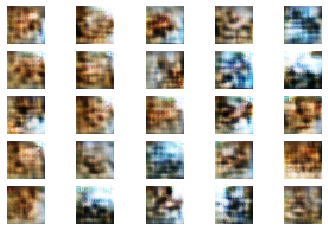

4 0.68598 0.67875916 0.72707635
4 0.65556914 0.63252413 0.82874846
4 0.65472066 0.5325413 1.0202289
4 0.6432901 0.4614731 1.164757
4 0.63416064 0.6951416 0.8592615
4 0.5914005 0.7157865 1.0078305
4 0.69816375 0.5845741 1.0345384
4 0.7353645 0.5404245 0.98092544
4 0.6341073 0.5366758 0.9866342
4 0.6837548 0.5620047 0.96921384
4 0.6545657 0.5859282 0.89046144
4 0.6478795 0.6157332 0.8001517
4 0.66056645 0.67904603 0.75500834
4 0.631968 0.6981702 0.7186277
4 0.6137641 0.72364676 0.7012606
4 0.6516281 0.8134885 0.7041034
4 0.61050683 0.7775213 0.6947669
4 0.669515 0.7611524 0.7089491
4 0.63629854 0.731166 0.7243441
4 0.68704814 0.7209258 0.75042117
4 0.6997733 0.6625817 0.8197799
4 0.7174042 0.41450757 1.2899036
4 0.69413596 0.4588333 1.237639
4 0.6747217 0.62202466 0.89484274
4 0.6805767 0.5974277 0.9321103
4 0.68368953 0.59653854 0.93548805
4 0.69117475 0.6451288 0.8744252
4 0.6715199 0.5945232 0.91842484
4 0.71737516 0.61957216 0.95352733
4 0.6934508 0.56358117 0.917979
4 0.6970395 0.56

4 0.6769753 0.7034124 0.7776977
4 0.68086714 0.66392964 0.8124256
4 0.7116047 0.6438484 0.84086835
4 0.67333686 0.6234671 0.8335017
4 0.68275243 0.70372903 0.7556355
4 0.64149654 0.746953 0.7534091
4 0.6641396 0.7068426 0.79011416
4 0.6919445 0.7358938 0.78797996
4 0.68327427 0.7161545 0.76140094
4 0.6934775 0.6895984 0.7497208
4 0.6715178 0.6505624 0.7705584
4 0.6405281 0.62827283 0.8331037
4 0.68826497 0.58724374 0.880299
4 0.6315603 0.6628259 0.7896923
4 0.6817642 0.6837938 0.7486403
4 0.66170543 0.72031534 0.7624252
4 0.6617805 0.6848777 0.76284003
4 0.7228247 0.72427505 0.7385564
4 0.6821375 0.7036946 0.76149267
4 0.6815275 0.6938163 0.76737773
4 0.6351429 0.67652476 0.8138362
4 0.6648874 0.5614548 0.92920756
4 0.68900144 0.52438325 1.0208857
4 0.6476933 0.6299659 0.8546503
4 0.6224912 0.6816509 0.820615
4 0.63152766 0.657832 0.8482115
4 0.63536334 0.70369005 0.7817548
4 0.6496775 0.69601256 0.86135733
4 0.6684717 0.66715336 0.83773434
4 0.6307072 0.6589485 0.82029474
4 0.6692481 

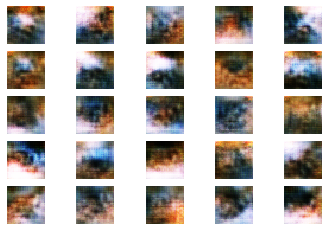

5 0.75920004 0.6592748 0.7103551
5 0.75026214 0.71487 0.6321751
5 0.80324966 0.7532892 0.6705526
5 0.72204137 0.65738505 0.7751693
5 0.69911677 0.56635284 0.8437322
5 0.7057972 0.5428897 0.914476
5 0.6790093 0.600165 0.9385282
5 0.71125674 0.57879007 0.95879686
5 0.6566252 0.6240816 0.9899883
5 0.5945248 0.6120005 1.0453341
5 0.54996085 0.5504549 1.0436127
5 0.6739337 0.50044376 0.98914146
5 0.6537231 0.5325169 1.1413596
5 0.6317642 0.45084447 1.1877544
5 0.59798133 0.5866467 0.880496
5 0.5783335 0.67852974 0.80776274
5 0.5710108 0.66795117 0.760313
5 0.537253 0.73403645 0.71270543
5 0.54320425 0.77556884 0.75721335
5 0.5820253 0.73230386 0.7608079
5 0.5977092 0.6850217 0.74315476
5 0.56964964 0.7336158 0.7905158
5 0.61617875 0.7189126 0.87935674
5 0.6510992 0.6246743 0.97797537
5 0.69460285 0.6446465 0.9743365
5 0.6858488 0.6262733 0.97050905
5 0.62528515 0.51980346 1.0037773
5 0.6267811 0.70916694 0.84872437
5 0.65489537 0.75088173 0.7788042
5 0.6076685 0.7074579 0.80112255
5 0.64468

5 0.58725846 0.7266848 0.81836367
5 0.6660146 0.6766899 0.8495949
5 0.6648878 0.73517704 0.74751097
5 0.6719239 0.7684982 0.74162585
5 0.63088787 0.7516351 0.7456949
5 0.6384735 0.7360359 0.79280025
5 0.6348605 0.6176331 0.90896285
5 0.65641874 0.5978707 0.908647
5 0.64599466 0.6388173 0.77891
5 0.6180808 0.6883614 0.78945494
5 0.67915744 0.644466 0.7905824
5 0.6360572 0.6772559 0.78295565
5 0.6710732 0.65559894 0.7891406
5 0.67217827 0.66489303 0.7926316
5 0.67667437 0.6760658 0.8132541
5 0.6715886 0.63391715 0.854668
5 0.7257214 0.5961962 0.88092005
5 0.69105995 0.5703229 0.91783065
5 0.73816025 0.54811645 0.9538058
5 0.6963757 0.5663457 0.9271602
5 0.64763045 0.5799483 0.8834421
5 0.6513364 0.59542245 0.9028263
5 0.7065159 0.622079 0.8932173
5 0.6545148 0.58078164 0.8847456
5 0.75696445 0.63094676 0.8434297
5 0.67498726 0.5772493 0.884228
5 0.7014556 0.5884812 0.82317406
5 0.711643 0.5835695 0.8529804
5 0.7612441 0.56103146 0.9354047
5 0.706925 0.51108915 1.0075374
5 0.7361731 0.537

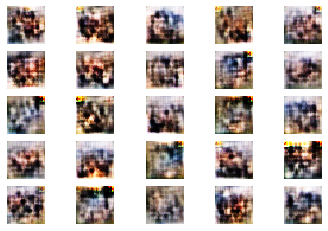

6 0.6360711 0.666711 0.95271343
6 0.6827516 0.6696688 1.0122113
6 0.6570506 0.650275 1.0406563
6 0.7277286 0.67480254 0.98560554
6 0.7076138 0.66797596 0.98599494
6 0.6540923 0.58291817 1.1016116
6 0.7478734 0.5355941 1.1136993
6 0.69245684 0.43115312 1.2233295
6 0.7230484 0.37779558 1.132475
6 0.72213435 0.39366293 1.0443542
6 0.7180798 0.43029726 0.88603145
6 0.5966364 0.43848863 0.80268866
6 0.61815566 0.40423003 0.77458155
6 0.6866844 0.47410822 0.73509467
6 0.6085136 0.54457915 0.6334146
6 0.5374633 0.5943886 0.55004984
6 0.59250957 0.60554576 0.57273227
6 0.7056019 0.6092162 0.56491584
6 0.68406117 0.6952208 0.68661106
6 0.6379163 0.6974054 0.7442438
6 0.7453449 0.68246865 0.86733496
6 0.7594398 0.656677 0.95531636
6 0.78636104 0.67552197 1.0312741
6 0.7058596 0.5441361 1.1369214
6 0.6757917 0.52475643 1.2602546
6 0.79101104 0.40481132 1.0366149
6 0.6359067 0.4369218 0.93151
6 0.65330684 0.46230167 0.71438104
6 0.548567 0.47295445 0.5702586
6 0.71210265 0.559141 0.48859686
6 0.52

6 0.5169878 0.7207432 0.8472318
6 0.529608 0.66478777 0.8348215
6 0.6028009 0.68508404 0.80057204
6 0.59124804 0.73750263 0.7294298
6 0.5637433 0.7266194 0.78871703
6 0.5619539 0.67135125 0.85813445
6 0.59329224 0.6486834 0.83715534
6 0.53288627 0.6833559 0.7972262
6 0.6223319 0.70267236 0.79731977
6 0.5472252 0.7009821 0.80074745
6 0.5869746 0.62574565 0.87509406
6 0.69620067 0.60936284 0.82791376
6 0.66054344 0.6473538 0.77560604
6 0.5885353 0.731245 0.76054966
6 0.6751188 0.6755258 0.83184636
6 0.691797 0.6652745 0.85452414
6 0.6837692 0.6536701 0.81785023
6 0.7033508 0.6519237 0.86017203
6 0.7525805 0.6382261 0.84989595
6 0.67076075 0.5576642 0.979164
6 0.71842724 0.5878991 1.081928
6 0.6880139 0.5130623 0.9402466
6 0.69443464 0.6587942 0.85358334
6 0.7007153 0.58199227 0.8980885
6 0.6684426 0.6068429 0.9406037
6 0.70166016 0.6097839 0.94108415
6 0.69578564 0.61491096 0.8733607
6 0.740165 0.62933075 0.91252947
6 0.75619745 0.64775336 0.8792499
6 0.7033026 0.58311236 0.8843496
6 0.7

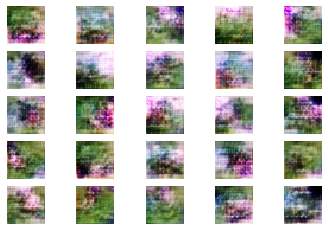

7 0.5588565 0.7818019 0.809955
7 0.4996574 0.90043163 0.8138923
7 0.63232785 0.9787549 0.7331115
7 0.52837396 0.910928 0.76489913
7 0.57093793 0.69198227 1.061887
7 0.617336 0.61964417 1.0381231
7 0.6054719 0.60814774 1.0366156
7 0.59116495 0.57426184 0.96787256
7 0.5769997 0.58899474 0.9873572
7 0.57547283 0.66203254 0.957886
7 0.6261519 0.6745025 0.8442852
7 0.50192416 0.69236076 0.8215426
7 0.48200598 0.74836963 0.76804245
7 0.57103896 0.7989952 0.7171469
7 0.5856049 0.8469565 0.66272485
7 0.6130618 0.8006072 0.66964185
7 0.6023455 0.7563765 0.7420953
7 0.60671115 0.7620299 0.7365999
7 0.6098949 0.76313627 0.8874187
7 0.7210213 0.7379883 0.86717916
7 0.68459857 0.74126005 0.84839284
7 0.73779833 0.75923073 0.89597183
7 0.6989859 0.6899469 0.9679392
7 0.70339096 0.5614375 1.1487715
7 0.66196394 0.3788122 1.2927798
7 0.6585703 0.5127543 1.1591672
7 0.63324225 0.6707405 0.85737604
7 0.5572552 0.8281368 0.7867669
7 0.6208414 0.7610587 0.8009964
7 0.67631125 0.7488453 0.79667634
7 0.6556

7 0.68387985 0.5893382 0.93177205
7 0.6770507 0.5093026 1.1410671
7 0.69646585 0.40933606 1.3700826
7 0.64426136 0.3722525 1.5995094
7 0.6344812 0.38580054 1.5906992
7 0.5662535 0.5352621 1.1403627
7 0.68672884 0.69577765 0.93882686
7 0.55760586 0.7403331 0.84855855
7 0.60490495 0.77611285 0.7564782
7 0.6061346 0.7983879 0.82183075
7 0.63860357 0.7013644 0.8608482
7 0.6508231 0.6519904 0.97309923
7 0.65407336 0.6136262 1.0758166
7 0.6681355 0.58054876 1.1473866
7 0.6452543 0.636524 1.082655
7 0.64202607 0.59232676 1.1275532
7 0.62093264 0.5558462 1.2094842
7 0.6229042 0.5534614 1.1205837
7 0.6269329 0.56438786 1.0407267
7 0.6529927 0.5172008 1.1189378
7 0.58524823 0.5290216 1.1526397
7 0.65458834 0.5389507 1.0204375
7 0.58962613 0.56289685 0.8970402
7 0.6675434 0.64867604 0.8551178
7 0.5790249 0.665141 0.8021234
7 0.6134474 0.6657692 0.8026476
7 0.53921235 0.67051613 0.77171975
7 0.6964748 0.64425725 0.75464743
7 0.6655206 0.6894436 0.7197224
7 0.58974266 0.70658064 0.70211923
7 0.6635

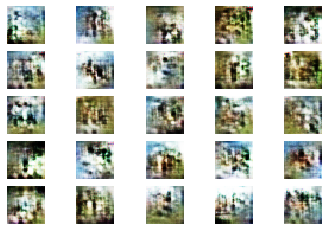

8 0.69563687 0.4154056 1.3802898
8 0.62878287 0.5077035 1.0051727
8 0.61664915 0.6018508 0.94058156
8 0.6006508 0.5824371 0.9602089
8 0.6503092 0.6081251 0.92675483
8 0.6641237 0.6005565 0.8563771
8 0.6450696 0.58967483 0.8877573
8 0.6550769 0.61312366 0.89874256
8 0.62379783 0.56215584 0.9016779
8 0.6576085 0.5826509 0.89746654
8 0.59953994 0.55199933 0.89567745
8 0.6907449 0.5825347 0.8744063
8 0.5772302 0.6506936 0.7960602
8 0.6839222 0.6859181 0.76587105
8 0.6455157 0.6721091 0.74274546
8 0.67103153 0.6850997 0.7379009
8 0.63905215 0.70897335 0.69460475
8 0.6604371 0.6941426 0.7018292
8 0.6611619 0.7048078 0.70552284
8 0.65816796 0.74316156 0.6867493
8 0.65131086 0.71358526 0.6985146
8 0.60676765 0.7044586 0.7350672
8 0.604293 0.68223876 0.77343744
8 0.62126964 0.64366466 0.7733905
8 0.6726384 0.7156842 0.7106265
8 0.6029916 0.73139274 0.6997015
8 0.620839 0.70577383 0.7178672
8 0.633754 0.7184756 0.71534824
8 0.62234783 0.70986074 0.7172509
8 0.61178964 0.67308605 0.76134235
8 0.6

8 0.69616234 0.6445495 0.85399634
8 0.73750794 0.6369675 0.8959693
8 0.7725289 0.66527617 0.8089425
8 0.7557606 0.7068973 0.9339746
8 0.8086236 0.57315147 0.9711261
8 0.76266897 0.59158003 1.0204446
8 0.7036291 0.5618009 1.1734127
8 0.6555245 0.44974262 1.2313447
8 0.74946606 0.48489696 1.1189615
8 0.6805129 0.6705889 0.8662789
8 0.5980389 0.71496964 0.81572866
8 0.6091858 0.7047996 0.8227446
8 0.7095591 0.7177896 0.7828222
8 0.66487694 0.6799066 0.82113427
8 0.6624354 0.6416868 0.8342683
8 0.682536 0.66883665 0.8461999
8 0.708209 0.65680754 0.91625684
8 0.6455021 0.6256739 0.9311011
8 0.61204326 0.5908799 0.9076622
8 0.6265296 0.6853671 0.8376508
8 0.5845953 0.8109958 0.79359907
8 0.60434926 0.77291656 0.7620597
8 0.6211604 0.7866849 0.75130236
8 0.6546877 0.8214711 0.76295626
8 0.6620524 0.76890206 0.7129418
8 0.7043377 0.7532722 0.8461786
8 0.72246003 0.66754067 0.93613994
8 0.6990229 0.5648217 1.0378387
8 0.63850534 0.5332525 1.0852308
8 0.58715713 0.5349264 1.063395
8 0.66925436 0

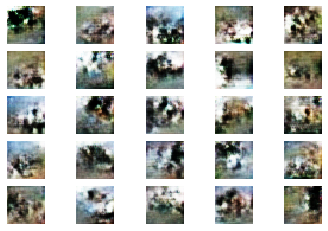

9 0.66876715 0.7440554 0.6766387
9 0.7157562 0.71234643 0.7540292
9 0.7405355 0.570786 0.9364134
9 0.68317115 0.51986265 0.90417767
9 0.6904938 0.673535 0.752075
9 0.65033203 0.7434164 0.77206373
9 0.64055943 0.6606118 0.83276546
9 0.6522765 0.58963215 0.8435885
9 0.6766889 0.5974082 0.83707315
9 0.7100136 0.6787035 0.7798992
9 0.70398533 0.6574005 0.88139546
9 0.6832785 0.58218753 0.93967813
9 0.7365202 0.5084199 1.1052898
9 0.67802334 0.42230636 1.1497664
9 0.6925043 0.61350423 0.9402165
9 0.63225245 0.6624499 0.8161006
9 0.6791969 0.62174624 0.8285325
9 0.6326721 0.63499725 0.8565873
9 0.7341569 0.6745423 0.8229837
9 0.637632 0.623532 0.86778694
9 0.6030345 0.6429663 0.90555185
9 0.73284006 0.6222866 0.78194356
9 0.66449475 0.72853893 0.6999771
9 0.6536516 0.7088543 0.69810337
9 0.6363989 0.71594566 0.73201084
9 0.65297264 0.7128955 0.7104206
9 0.6699848 0.6932322 0.7414726
9 0.66564083 0.6660514 0.81753457
9 0.6837453 0.5774824 0.866198
9 0.6888908 0.6710833 0.7908539
9 0.6469209 0

9 0.7030949 0.5279088 1.0713415
9 0.6891222 0.5106534 1.0599126
9 0.63427526 0.5851975 0.9888015
9 0.6737062 0.626384 0.97780085
9 0.63501644 0.64388704 0.8755628
9 0.5957575 0.7415979 0.73687845
9 0.6022344 0.7771138 0.7554431
9 0.7213352 0.7695743 0.76399815
9 0.6432232 0.75004554 0.80632365
9 0.6600827 0.7320178 0.8522886
9 0.7216282 0.6356909 0.9393792
9 0.7720115 0.5636413 1.0094216
9 0.7574192 0.55365777 1.021724
9 0.72535825 0.52736306 1.0606961
9 0.71273595 0.6001005 0.97744465
9 0.68859637 0.61766636 0.936986
9 0.7171651 0.59361947 0.92899585
9 0.65753174 0.5875815 0.98493725
9 0.63805056 0.58704627 0.95981365
9 0.60737866 0.54371256 0.9188428
9 0.60253656 0.61459297 0.8665929
9 0.5968236 0.6522107 0.83890647
9 0.5664116 0.63488954 0.8068833
9 0.61181736 0.6670604 0.761269
9 0.6054474 0.72891915 0.73968077
9 0.6043609 0.7180234 0.7553944
9 0.6672778 0.65217245 0.76714885
9 0.6308532 0.65663743 0.75606406
9 0.59211564 0.6261052 0.7720132
9 0.68936527 0.68069303 0.7869166
9 0.69

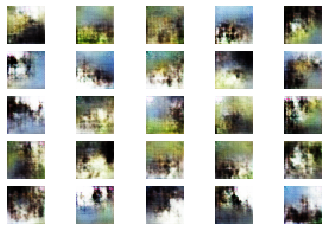

10 0.59123486 0.64232177 0.78979367
10 0.6233691 0.75342417 0.7913389
10 0.7088764 0.67864406 0.777614
10 0.61309195 0.6706738 0.83122706
10 0.6708027 0.6486789 0.95577407
10 0.647015 0.5843315 0.9035657
10 0.6545961 0.56375206 0.9005186
10 0.646581 0.60121095 0.96283793
10 0.64862055 0.62140965 0.904926
10 0.64012206 0.56952274 0.90710044
10 0.6442937 0.5822458 0.92617464
10 0.6069421 0.60664314 0.8984306
10 0.59632015 0.58524525 0.98351383
10 0.6767596 0.6234768 0.8890624
10 0.63891196 0.6665056 0.8574777
10 0.6291445 0.6454974 0.8483318
10 0.6246443 0.6687056 0.86081266
10 0.59845406 0.6414148 0.8264263
10 0.6569002 0.61912477 0.8353772
10 0.59141 0.60073787 0.90726703
10 0.6331374 0.6102199 0.90882
10 0.648088 0.6023267 0.95814615
10 0.632184 0.6041641 0.93059045
10 0.6935737 0.6942408 0.8055026
10 0.67417145 0.7150898 0.75997305
10 0.6133944 0.71519184 0.7914419
10 0.5873278 0.7367285 0.80951566
10 0.6517801 0.71760523 0.82412183
10 0.63097024 0.645528 0.7816067
10 0.7306757 0.678

10 0.6736858 0.6539924 0.8275445
10 0.58619183 0.60687333 0.85094815
10 0.6319948 0.58704674 0.8968
10 0.6142087 0.67656213 0.7374494
10 0.6375338 0.6920421 0.85199887
10 0.6152365 0.5851402 0.96246594
10 0.62856776 0.54849637 1.0282996
10 0.5670779 0.70280766 0.86299
10 0.69423425 0.7174692 0.75963753
10 0.6586444 0.72158563 0.7832092
10 0.68111277 0.7549967 0.7777102
10 0.65373296 0.6570869 0.81639826
10 0.7416672 0.6756402 0.75255084
10 0.75721204 0.6655468 0.82966626
10 0.66703135 0.6912527 0.8540275
10 0.6799434 0.6224829 0.87587416
10 0.6793343 0.59764445 0.95739627
10 0.6558901 0.6105896 0.9801409
10 0.6723761 0.56882703 1.021719
10 0.6713299 0.6215698 0.91455764
10 0.6571938 0.6135983 0.88184315
10 0.68065107 0.62811816 0.8695083
10 0.59573007 0.6297064 0.8996433
10 0.63524103 0.58994454 0.96427345
10 0.6680851 0.57011163 0.91053754
10 0.7507366 0.62735593 0.85885584
10 0.65186155 0.6813489 0.81507814
10 0.6479465 0.64841104 0.8542511
10 0.66443896 0.6409787 0.8481109
10 0.7224

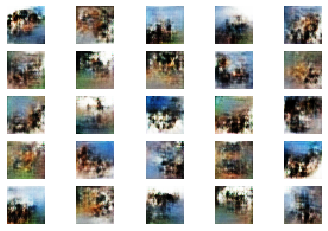

11 0.6209666 0.5710005 1.0228503
11 0.6448306 0.56136584 0.98876697
11 0.5780777 0.6283634 0.95096445
11 0.6377026 0.5918847 0.9889622
11 0.7110566 0.6106391 0.9520421
11 0.662727 0.6365835 0.91500115
11 0.6858307 0.592616 0.92469984
11 0.69542706 0.6624932 0.8842577
11 0.6728441 0.7212913 0.8061615
11 0.6970153 0.7152869 0.83199465
11 0.6779163 0.7060075 0.80364066
11 0.6980125 0.70792544 0.8453976
11 0.72008085 0.65538335 0.816003
11 0.6758684 0.6838004 0.8878575
11 0.7167125 0.5712658 0.964162
11 0.6439227 0.6161606 0.9199647
11 0.7096778 0.6081549 0.8964535
11 0.6131655 0.6015335 0.94445246
11 0.71631855 0.64619243 0.8882902
11 0.67852545 0.66290736 0.87560314
11 0.6284674 0.6330402 0.81943375
11 0.6602795 0.69783777 0.79069006
11 0.6937442 0.7540376 0.7805363
11 0.66385245 0.71561986 0.78895724
11 0.6948174 0.66105425 0.8408909
11 0.6703465 0.6323179 0.88867867
11 0.6567606 0.64383215 0.9303765
11 0.6503447 0.62847996 1.05276
11 0.67130476 0.59723425 0.99028665
11 0.6645088 0.6395

11 0.7337712 0.65642077 0.8210764
11 0.71089095 0.6045481 0.96051157
11 0.6405125 0.64978635 0.8754908
11 0.72592115 0.6531309 0.938324
11 0.66230166 0.6452402 0.88182104
11 0.6637746 0.5994623 0.9695613
11 0.7268891 0.5369859 0.91160464
11 0.66675365 0.6811174 0.8894529
11 0.6091627 0.6097206 0.8336936
11 0.57752335 0.67797756 0.8356274
11 0.64664614 0.67856354 0.8461499
11 0.6851215 0.5268718 0.9644762
11 0.6309475 0.73902786 0.8788333
11 0.59490645 0.7156588 0.8174075
11 0.6429501 0.64936864 0.8178376
11 0.65603954 0.69334793 0.8736565
11 0.7094748 0.67920774 0.90259874
11 0.6550587 0.59251106 1.0311902
11 0.8160069 0.5861579 0.9283609
11 0.6199064 0.595428 0.9312619
11 0.74927235 0.61278105 0.9334225
11 0.7882924 0.59767926 1.0005846
11 0.60601276 0.5550238 1.0242739
11 0.69278854 0.5442682 1.0574503
11 0.6712428 0.6338637 0.9367684
11 0.6760391 0.6753644 0.9115691
11 0.65414715 0.5844418 1.0564475
11 0.68288624 0.5578094 1.0644306
11 0.78193265 0.5358707 1.0132033
11 0.68429846 0.

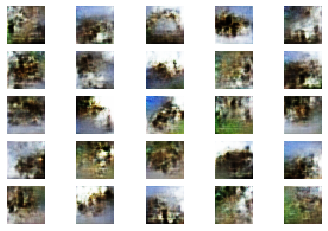

12 0.58217436 0.68423176 0.85401344
12 0.71355164 0.6652522 0.824036
12 0.75673234 0.6886077 0.7378969
12 0.61279476 0.5877766 0.7377172
12 0.6452218 0.5810895 0.7791388
12 0.75795066 0.6836674 0.7223364
12 0.686517 0.6601213 0.7320613
12 0.62044656 0.56113356 0.92967975
12 0.6495831 0.51775414 0.9899901
12 0.5742438 0.6667012 0.7826765
12 0.5410933 0.7171396 0.86216104
12 0.6383501 0.6664313 0.89477277
12 0.65628695 0.55633867 1.0761567
12 0.6766836 0.5643458 1.1634226
12 0.68492484 0.4944871 1.1850003
12 0.61575127 0.53452224 1.1117985
12 0.77245116 0.49878278 0.93893445
12 0.6519283 0.55652577 0.91478395
12 0.6118566 0.61557347 0.8444557
12 0.54717314 0.62758744 0.8736005
12 0.57257617 0.6415377 0.8902259
12 0.7343039 0.68927205 0.7700445
12 0.6666148 0.71464074 0.7832716
12 0.6944968 0.76076734 0.8070594
12 0.6577359 0.72701347 0.8248359
12 0.6843143 0.6755217 0.86116886
12 0.70569 0.6190386 0.9685837
12 0.7343729 0.6341951 0.92703605
12 0.7904744 0.6577431 0.94500995
12 0.8432694 

12 0.68996406 0.65935427 0.8596315
12 0.6993398 0.61296046 0.89183223
12 0.70864844 0.6012271 0.8491491
12 0.7450025 0.6272613 0.89735097
12 0.6584257 0.5972979 0.87895507
12 0.77786994 0.6321187 0.8015015
12 0.6579871 0.68704945 0.79824144
12 0.65765333 0.65814114 0.76000154
12 0.6884114 0.7124951 0.7930286
12 0.656322 0.6921401 0.81256443
12 0.67440826 0.6836255 0.79190576
12 0.68731236 0.64548117 0.8242747
12 0.63665223 0.7038634 0.8029816
12 0.657761 0.7021128 0.8933602
12 0.7863929 0.6155075 0.9237404
12 0.7165302 0.5854454 0.9635192
12 0.62506694 0.57673585 1.0603812
12 0.6538846 0.5236741 1.0530019
12 0.6881789 0.564786 1.0117453
12 0.59996206 0.5590448 0.8916092
12 0.6524569 0.5870646 0.9454987
12 0.6402267 0.61065155 0.9440142
12 0.6399281 0.5639807 0.9152006
12 0.5907086 0.6552952 0.8452876
12 0.6267036 0.67012924 0.8751861
12 0.5857862 0.6931819 0.8366711
12 0.627753 0.68745667 0.7762737
12 0.6357379 0.6779634 0.8563462
12 0.6416111 0.68932515 0.81504357
12 0.62889135 0.6126

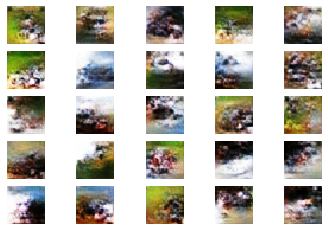

13 0.67675734 0.5873931 0.9102924
13 0.69152343 0.6005393 0.9214283
13 0.68494946 0.5463878 0.928546
13 0.78453994 0.675652 0.8592864
13 0.68938005 0.60497844 0.9078342
13 0.60439396 0.5932704 0.8965527
13 0.7136944 0.61489093 0.9104272
13 0.74554795 0.5857848 0.8781141
13 0.68645537 0.6131172 0.9393618
13 0.64996016 0.6348374 1.0103906
13 0.66309226 0.5487839 1.096477
13 0.61883914 0.56894326 1.1256013
13 0.6683866 0.5397006 1.0525416
13 0.6511493 0.55029935 1.0185592
13 0.6584288 0.5486404 0.92961955
13 0.6811378 0.6321504 0.87839705
13 0.6323091 0.65483695 0.80837
13 0.6095321 0.635427 0.7684567
13 0.6135429 0.60821134 0.72042626
13 0.6244335 0.53340816 0.7998742
13 0.6002686 0.5744283 0.82537127
13 0.6640903 0.48642144 0.97799027
13 0.602898 0.46724522 1.0786061
13 0.6094438 0.50592476 0.91253126
13 0.5393248 0.58725345 0.789227
13 0.54107285 0.69620806 0.6874614
13 0.49030423 0.73330116 0.73139566
13 0.56872106 0.68906575 0.7939614
13 0.52574074 0.64768803 0.9725734
13 0.5883534 0

13 0.5893179 0.5684563 0.86849993
13 0.63637406 0.6409064 0.8627096
13 0.60969305 0.64152265 0.8714989
13 0.6007425 0.6145167 0.92025524
13 0.680472 0.5344384 0.9917004
13 0.63714266 0.67702043 0.946481
13 0.642787 0.72773635 0.83682895
13 0.6824394 0.683101 0.7822801
13 0.64744323 0.6984787 0.77928746
13 0.6840102 0.6607492 0.76897585
13 0.6624532 0.66246384 0.7116489
13 0.5869671 0.6872269 0.6648247
13 0.77187765 0.6209394 0.67399853
13 0.6776172 0.6682956 0.725636
13 0.682487 0.7298486 0.68821
13 0.63239497 0.63377434 0.8176091
13 0.6835003 0.6255257 0.9336919
13 0.7265501 0.58411443 0.93803054
13 0.624333 0.59928674 0.9331862
13 0.687068 0.5469043 0.9733882
13 0.6235923 0.62237763 0.8836385
13 0.68510973 0.5782135 0.86671793
13 0.6545696 0.6277008 0.8873055
13 0.5985057 0.5497565 0.94539535
13 0.8374514 0.59712756 0.9986673
13 0.62387025 0.58761 1.1170261
13 0.6857543 0.5758349 1.1783216
13 0.67527103 0.59658456 0.9862109
13 0.6350926 0.5234695 0.8917042
13 0.6164213 0.56492245 0.8

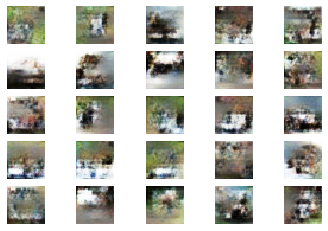

14 0.7193608 0.6349423 0.8190328
14 0.6718267 0.6054262 0.8671629
14 0.634351 0.54428065 0.9071978
14 0.66659546 0.62774956 0.9023737
14 0.6513554 0.6327241 0.8312471
14 0.62972474 0.5708347 0.87097615
14 0.59360635 0.63045573 0.87832713
14 0.6279889 0.62341833 0.93628466
14 0.5972897 0.58748984 0.94263935
14 0.6120759 0.56037325 0.9959774
14 0.67690206 0.611451 0.9530422
14 0.5923079 0.5872135 0.85745895
14 0.5605593 0.65293205 0.98146516
14 0.6350726 0.6442278 0.9629953
14 0.6165828 0.5540445 0.95909816
14 0.5762849 0.56468153 0.97047937
14 0.6629457 0.4930159 1.0372956
14 0.60944796 0.5835039 0.9281163
14 0.7076515 0.5787943 0.9442505
14 0.5729288 0.61801547 0.8383626
14 0.5618358 0.59477055 0.8667654
14 0.61089206 0.63847774 0.892321
14 0.6966107 0.63132584 0.8635719
14 0.6665596 0.6035689 0.924996
14 0.62982523 0.6817668 0.8355199
14 0.58469635 0.7145026 0.8642887
14 0.68857795 0.6336576 0.8786557
14 0.6890395 0.62598336 0.85798305
14 0.67843366 0.58080655 0.8389429
14 0.6196286 0

14 0.6046876 0.5600256 0.98120433
14 0.55838823 0.57360816 0.9683522
14 0.61065614 0.5903767 0.8369175
14 0.55402756 0.60717714 0.8676833
14 0.56964505 0.6491834 0.99705136
14 0.6892514 0.7235335 1.0885963
14 0.71085346 0.52615595 1.316211
14 0.66527593 0.44306803 1.3691869
14 0.9990639 0.39686778 1.2841704
14 0.63450444 0.49372426 1.2747562
14 0.6721227 0.4976469 1.4101323
14 0.6632292 0.39217418 1.5373654
14 0.510658 0.65021133 1.1940973
14 0.49235082 0.8012015 0.94507086
14 0.5929042 0.67164385 0.92515194
14 0.5534262 0.6850432 0.9438466
14 0.61667556 0.6596559 0.95296764
14 0.5055577 0.5334401 0.9768078
14 0.62352973 0.64879787 0.83670074
14 0.6292567 0.7526283 0.77698153
14 0.62264323 0.7825826 0.8406406
14 0.62227476 0.75235164 0.8323152
14 0.65240365 0.7845835 0.7661744
14 0.5879878 0.7504424 0.7960652
14 0.7252647 0.7238204 0.8797157
14 0.7458335 0.688304 0.9304679
14 0.71166813 0.5893334 1.0096947
14 0.72222257 0.61644053 1.1000457
14 0.7331443 0.5667728 1.0068469
14 0.6459522

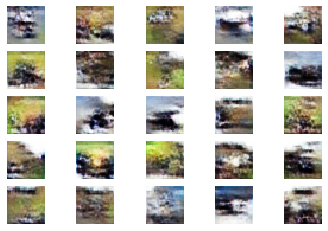

15 0.62638104 0.6061008 0.9158823
15 0.6428652 0.63865316 0.8609915
15 0.6172413 0.6705439 0.87866366
15 0.6169914 0.64026964 0.92836916
15 0.677765 0.60791737 0.93136096
15 0.635848 0.6036817 0.9117434
15 0.63239694 0.5955548 0.9626796
15 0.67456615 0.5227014 0.9324127
15 0.63360727 0.59332937 0.9432122
15 0.63981247 0.645025 0.92473125
15 0.60840315 0.5496061 0.96926576
15 0.56371355 0.59247386 0.9071075
15 0.6227523 0.6365677 0.8781736
15 0.6313168 0.59824395 0.89806604
15 0.6349261 0.62243056 0.866092
15 0.61206406 0.6583179 0.8702134
15 0.65776336 0.63277566 0.92546785
15 0.609957 0.6404128 1.0022035
15 0.63527364 0.66741896 0.9408596
15 0.75498545 0.6138699 0.9989849
15 0.62065995 0.5919455 1.057644
15 0.632933 0.5807233 1.0176058
15 0.65927315 0.5593115 0.9336335
15 0.6123923 0.5774962 1.0039983
15 0.58869946 0.63493717 1.0005028
15 0.61258656 0.58567375 0.9666614
15 0.5889582 0.56117636 1.0116575
15 0.57502204 0.5279279 0.9867513
15 0.6419345 0.54010665 0.9843691
15 0.67346394 

15 0.67611945 0.64660615 0.9304313
15 0.6555898 0.6357807 0.9072156
15 0.64838594 0.6130049 0.8864588
15 0.66369164 0.65642935 0.86833686
15 0.6643175 0.648885 0.84181464
15 0.66421103 0.62015116 0.88782793
15 0.6802484 0.6288555 0.9515372
15 0.5982456 0.6323569 0.9416418
15 0.65539086 0.5725771 0.9600508
15 0.6388439 0.561494 0.9869882
15 0.61727107 0.54875183 0.98057914
15 0.6152513 0.5495416 0.9762995
15 0.64779377 0.59140265 0.92682
15 0.5781629 0.5400661 0.90421784
15 0.6085094 0.6078409 0.8551326
15 0.61293197 0.6518489 0.8871924
15 0.6283136 0.68028677 0.78693867
15 0.5977847 0.6585608 0.715399
15 0.6640106 0.65641344 0.78023744
15 0.6340989 0.62788737 0.8085343
15 0.6034602 0.706041 0.7572701
15 0.60846525 0.7312316 0.7921808
15 0.632864 0.6537241 0.870942
15 0.5998566 0.7162148 0.7978916
15 0.6336577 0.75172883 0.83108324
15 0.61793995 0.70674396 0.86514384
15 0.6051793 0.6805085 0.9579614
15 0.69100404 0.6654563 1.0061973
15 0.69026196 0.6035379 0.9162297
15 0.61675495 0.6607

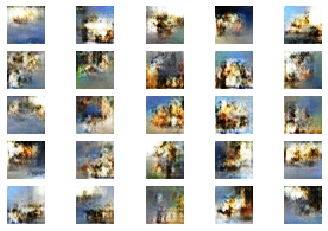

16 0.6019454 0.5963894 0.9582107
16 0.630036 0.5523195 0.9812514
16 0.663185 0.6042058 0.9927953
16 0.63928354 0.5843594 0.9528291
16 0.6162224 0.6474374 0.95906305
16 0.60891104 0.64545155 0.9262776
16 0.6407034 0.6792549 0.8552022
16 0.61951995 0.6401975 0.816641
16 0.60151136 0.6606271 0.83813465
16 0.5986674 0.6647403 0.85347795
16 0.62585187 0.5755504 0.8233564
16 0.7477062 0.63026744 0.708201
16 0.6673159 0.65483916 0.6654937
16 0.6416925 0.6932237 0.70606464
16 0.6250942 0.69061685 0.7048733
16 0.6464798 0.69728446 0.79413486
16 0.702827 0.62292206 0.8343632
16 0.67074335 0.568756 0.93852997
16 0.6094543 0.61878973 0.9771104
16 0.68686426 0.5321666 1.1575022
16 0.66997427 0.5145454 1.1402537
16 0.85273343 0.56815356 0.9756571
16 0.6776112 0.54359925 1.0074522
16 0.61716205 0.6201747 0.9742902
16 0.6614839 0.5858711 0.9806002
16 0.55691934 0.55450326 0.98340476
16 0.6936265 0.5309175 0.99450505
16 0.56976646 0.5337942 0.9789842
16 0.66618943 0.5534766 0.92413765
16 0.64695215 0.5

16 0.66456455 0.7582904 0.7802938
16 0.6435765 0.6681028 0.8215304
16 0.6338707 0.6087959 0.99504715
16 0.64542687 0.6228908 0.96072084
16 0.7620195 0.61420834 0.91438305
16 0.6401583 0.63191223 0.8710643
16 0.67944264 0.64431113 0.91556686
16 0.61742336 0.6376727 0.99336696
16 0.7258235 0.55865836 0.98594356
16 0.7931404 0.6206322 0.98351514
16 0.79190457 0.60006005 0.89418423
16 0.6469734 0.63817376 0.88823843
16 0.6181158 0.66297776 0.9094708
16 0.66135854 0.5666559 0.9709121
16 0.6139728 0.63399357 0.9497802
16 0.7062869 0.65769506 0.8604876
16 0.59158385 0.6398792 0.85987246
16 0.52182555 0.6005276 0.9023372
16 0.7081188 0.5641446 0.9052396
16 0.6578491 0.56284326 0.9245615
16 0.6905211 0.7117613 0.80716825
16 0.7806034 0.6839679 0.8363222
16 0.70844877 0.69470936 0.8313575
16 0.6567664 0.65059114 0.85601735
16 0.7404666 0.67624736 0.7847816
16 0.62874025 0.7136425 0.815855
16 0.68747485 0.68660134 0.8470229
16 0.62255704 0.6934477 0.8252418
16 0.61485887 0.70042974 0.909631
16 0.

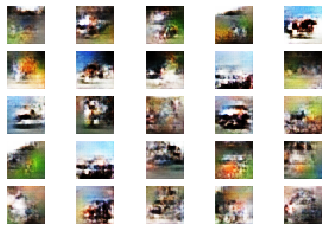

17 0.62484926 0.6024659 0.954914
17 0.5836706 0.59046936 0.9670513
17 0.669869 0.5636116 0.9182688
17 0.5549525 0.6118622 0.85861677
17 0.62063754 0.5686487 0.9368609
17 0.6404389 0.59655255 0.83746666
17 0.58768976 0.6656083 0.8181928
17 0.656466 0.5959801 0.7887701
17 0.5999625 0.67134166 0.69794214
17 0.63258433 0.69019127 0.7920002
17 0.6448622 0.66395485 0.82203007
17 0.6343206 0.66318893 0.8699177
17 0.5560094 0.6733824 0.9322471
17 0.6899952 0.60037076 0.96769357
17 0.6117532 0.6648215 1.0071839
17 0.57410204 0.6599965 1.0287106
17 0.55403006 0.70562136 0.92288345
17 0.7000702 0.6975132 0.8577987
17 0.7075697 0.6748188 0.860858
17 0.552314 0.6299755 0.9076673
17 0.59778404 0.5502745 0.93645304
17 0.58462936 0.59961784 0.9684316
17 0.63325477 0.6211907 0.94588333
17 0.67627984 0.65787077 0.89087284
17 0.5718882 0.7167132 0.8051343
17 0.6166265 0.6688603 0.8834127
17 0.65445054 0.6881616 0.82285607
17 0.6336634 0.774897 0.859831
17 0.63424236 0.6491146 0.9181674
17 0.6586146 0.620

17 0.65940404 0.6798923 0.7901594
17 0.652591 0.64870334 0.805702
17 0.63114035 0.67671794 0.7946894
17 0.6734705 0.70923626 0.8941389
17 0.67434615 0.58637196 1.0056425
17 0.6155548 0.5354937 1.0981996
17 0.74353343 0.4866879 1.1691912
17 0.72581923 0.54791665 1.0183632
17 0.6976437 0.57009345 0.97272134
17 0.60167754 0.65278983 0.93226063
17 0.6365066 0.60136926 0.8877537
17 0.66920835 0.61364245 0.9286319
17 0.6609293 0.70846045 0.8488908
17 0.62166345 0.6578084 0.8785765
17 0.64201564 0.5923816 0.8735983
17 0.65494704 0.61454976 0.88066226
17 0.58305156 0.687737 0.8733297
17 0.59853494 0.62777805 0.8823272
17 0.65161604 0.6260852 0.86466134
17 0.613662 0.60644305 0.8800175
17 0.6257062 0.621246 0.81931627
17 0.6648568 0.68620694 0.8111731
17 0.61140865 0.6729049 0.8632586
17 0.65630925 0.7217845 0.90803623
17 0.6215611 0.6128342 0.8824578
17 0.56818473 0.6904377 0.9239768
17 0.6274779 0.6334804 0.9003329
17 0.58916473 0.6351583 0.8346606
17 0.66429836 0.61453414 0.86997855
17 0.625

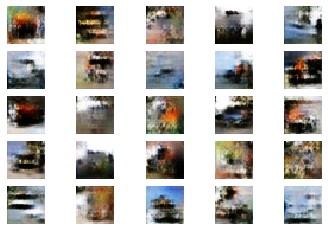

18 0.6529153 0.6435865 1.0194818
18 0.7256305 0.5614465 0.98853076
18 0.6235499 0.66715175 0.8994312
18 0.6377865 0.61314607 1.0000974
18 0.59681416 0.59814084 1.0131981
18 0.709962 0.6239127 0.916986
18 0.5971043 0.6368967 0.90093625
18 0.5984088 0.5996936 0.88014644
18 0.7593534 0.69526666 0.8932972
18 0.6490641 0.59303176 0.89035666
18 0.59091955 0.68309057 0.93962324
18 0.64422625 0.6026743 0.9679651
18 0.6308334 0.56554574 0.99697185
18 0.721448 0.5719227 1.0123096
18 0.67647696 0.6018342 0.91671896
18 0.61044693 0.67670685 0.9541769
18 0.6325856 0.63634014 0.98851895
18 0.6485019 0.65225565 0.9472258
18 0.6323086 0.66149837 0.981581
18 0.621765 0.58548737 0.9376215
18 0.644298 0.6180973 0.88250315
18 0.64741415 0.7153868 0.92111695
18 0.6757171 0.6261555 0.954337
18 0.69219863 0.6449623 0.9105311
18 0.69971335 0.6610758 1.0224847
18 0.63545465 0.64571875 0.966233
18 0.5429394 0.6009999 1.0371304
18 0.5853823 0.56489325 0.98123777
18 0.735448 0.7340989 0.84280044
18 0.6366513 0.72

18 0.63766944 0.5639796 1.0162536
18 0.6273121 0.57101095 0.95968205
18 0.5943528 0.60987264 0.92607015
18 0.60324585 0.6157093 0.98867166
18 0.5438851 0.6636845 0.7927674
18 0.5769351 0.6878927 0.83310056
18 0.590966 0.7229928 0.85101116
18 0.6557065 0.6551775 0.8764037
18 0.71408373 0.64904606 0.89284545
18 0.64977044 0.66453147 0.8646388
18 0.69916385 0.64663565 0.9410443
18 0.6583204 0.62991184 0.9916527
18 0.7129483 0.6131319 0.9626682
18 0.7123147 0.6557478 0.9984199
18 0.67340326 0.54090714 1.0364474
18 0.73049945 0.58669245 1.0040162
18 0.7076985 0.62050533 0.9919358
18 0.5883329 0.5370344 0.9853723
18 0.6400806 0.6322336 0.9496768
18 0.7681818 0.7073797 0.8582355
18 0.7263913 0.6784094 0.82261574
18 0.7078998 0.6802887 0.8642585
18 0.7589957 0.7194066 0.8266369
18 0.6763583 0.67571515 0.8654414
18 0.6867912 0.7042825 0.8738243
18 0.660311 0.6033236 0.9787817
18 0.7273284 0.5727268 1.0519097
18 0.741143 0.60352653 1.1732703
18 0.69385064 0.54053885 1.0585783
18 0.68517244 0.660

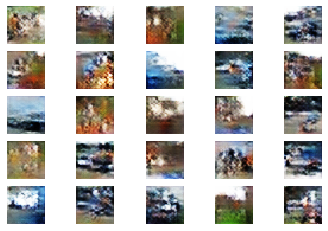

19 0.672492 0.5247826 1.0974402
19 0.6807043 0.5790718 1.0210935
19 0.68185395 0.5816395 0.93862265
19 0.6779958 0.6288729 0.98384964
19 0.6887733 0.66508627 0.9568162
19 0.71256816 0.6554992 0.92069757
19 0.7226007 0.6572852 0.9359391
19 0.7045599 0.5825685 0.98806906
19 0.714309 0.5627817 1.019222
19 0.6701704 0.5841474 1.0020711
19 0.7173108 0.65458435 1.0140659
19 0.72281504 0.63999844 0.96543914
19 0.6664986 0.6526481 0.94028234
19 0.7310207 0.67084503 0.88126934
19 0.7269295 0.65466976 0.87279624
19 0.59697425 0.5878831 1.0031102
19 0.6983549 0.60585576 0.95556325
19 0.6470169 0.5846944 0.9442467
19 0.6658155 0.6143782 0.9879075
19 0.6569824 0.59161425 0.9402884
19 0.6664756 0.6239094 0.92764884
19 0.53850055 0.5383892 0.92326677
19 0.57187706 0.6544293 0.88041776
19 0.6703213 0.6484776 0.88670576
19 0.6149186 0.62671614 0.8701413
19 0.65202314 0.6153544 0.93038476
19 0.7246264 0.5924282 0.8996656
19 0.6305938 0.57571167 0.98107207
19 0.6620598 0.5872802 0.8981321
19 0.6281096 0.

19 0.6132139 0.5515976 0.9789517
19 0.65158975 0.6068543 0.94118285
19 0.5833118 0.67355865 0.97488886
19 0.63892585 0.6659105 0.8637751
19 0.65752965 0.67099786 0.868863
19 0.6422479 0.67606235 0.8560689
19 0.6633205 0.60789037 0.8513259
19 0.6608521 0.60386133 0.8464626
19 0.6387868 0.6925805 0.7958451
19 0.705486 0.72150075 0.8574443
19 0.6402124 0.6641072 0.9301894
19 0.6750162 0.6827793 0.93719316
19 0.6474767 0.7299437 0.9762963
19 0.6579208 0.692404 0.88414216
19 0.65335596 0.6705603 0.944412
19 0.66127896 0.6050395 0.9332856
19 0.7182256 0.6322015 0.960912
19 0.65008247 0.6195316 0.9065895
19 0.7265475 0.62555957 0.8970432
19 0.7098573 0.6171062 0.9033281
19 0.6650523 0.71888983 0.83950305
19 0.6579789 0.7390183 0.82532364
19 0.6748479 0.72170734 0.88305163
19 0.6762491 0.65844154 0.814217
19 0.6344572 0.67405415 0.82491183
19 0.70498 0.695387 0.7780041
19 0.7024843 0.7429495 0.8530958
19 0.7028408 0.6619061 0.8704089
19 0.77292776 0.656484 0.9038507
19 0.71671367 0.56726074 0.

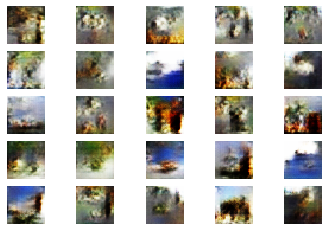

20 0.5295217 0.7886913 0.80664337
20 0.6274555 0.8313629 0.84428084
20 0.64771336 0.68214554 0.8688893
20 0.7165246 0.6380824 1.0027959
20 0.6460482 0.6766505 1.0450158
20 0.7775512 0.69231045 0.814708
20 0.69705397 0.71320343 0.80150527
20 0.6821592 0.68957776 0.8318346
20 0.6658815 0.63628066 0.91517603
20 0.6408849 0.6699256 0.81838846
20 0.5485531 0.71844816 0.8849101
20 0.57367593 0.7459481 0.85173845
20 0.67482066 0.7779158 0.8301653
20 0.6976243 0.7937133 0.7748555
20 0.6921915 0.65693444 0.86573476
20 0.64820385 0.6601264 0.91468483
20 0.6025932 0.58784866 1.1103628
20 0.5552666 0.5194887 1.1942165
20 0.5337733 0.5804667 1.1071148
20 0.64470744 0.6645088 1.1088991
20 0.55946505 0.57904655 1.0751233
20 0.66880226 0.54726195 1.1067507
20 0.70190644 0.5451227 0.996528
20 0.64402264 0.6579901 0.98245984
20 0.6869258 0.6190741 0.92613566
20 0.67242956 0.696257 0.9662499
20 0.693576 0.6397575 0.90710646
20 0.71844053 0.68760663 0.9341235
20 0.7594588 0.6745585 0.9373815
20 0.67981195

20 0.583747 0.69422114 0.84313154
20 0.6229005 0.7015661 0.8584581
20 0.73505473 0.71156406 0.8696313
20 0.6948658 0.6895749 0.8488078
20 0.6223417 0.6784046 0.9284105
20 0.60031 0.7021296 0.9342356
20 0.70581234 0.618925 0.8952913
20 0.78329694 0.67762554 0.8147244
20 0.7348411 0.69061875 0.8741636
20 0.75277007 0.72350717 0.88253456
20 0.7220501 0.77820575 0.76925796
20 0.77806944 0.7288554 0.8477634
20 0.7347172 0.71712464 0.8698814
20 0.76318765 0.6423588 0.9390124
20 0.75140095 0.653468 0.9734322
20 0.762542 0.6064331 0.9703633
20 0.7522003 0.6318058 1.0556233
20 0.65894413 0.6940723 1.1759745
20 0.68075955 0.5684107 1.0693262
20 0.63303125 0.5393938 1.119034
20 0.6102764 0.6194171 1.0740237
20 0.65415645 0.60224366 0.9605292
20 0.6433464 0.7242362 0.9882901
20 0.6816767 0.6550158 0.8599842
20 0.6808795 0.6937842 0.9621434
20 0.6853018 0.61632514 0.9055189
20 0.6381106 0.6095972 0.9641409
20 0.7041666 0.5561352 0.9568678
20 0.72289026 0.5759264 0.99116004
20 0.62934864 0.55991507 

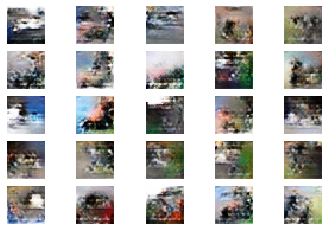

21 0.6685229 0.6919476 0.7523145
21 0.5524627 0.6916976 0.7714508
21 0.6149075 0.6182338 0.843561
21 0.6743123 0.64615536 0.8227916
21 0.60771763 0.7069103 0.84646606
21 0.63208485 0.5858028 0.9325243
21 0.6765908 0.6460016 0.92445606
21 0.6560472 0.60625243 1.090915
21 0.5968648 0.6452138 1.1459742
21 0.7112626 0.59980035 1.0477098
21 0.617219 0.6818199 1.0041726
21 0.6787497 0.6079978 1.0124239
21 0.7271702 0.57144856 0.9424206
21 0.6648291 0.66254616 0.8468958
21 0.6683906 0.6300541 0.80616593
21 0.6388432 0.68432796 0.81382215
21 0.62805796 0.65572846 0.80099
21 0.7100864 0.67953503 0.8838614
21 0.72323805 0.67984146 0.82351214
21 0.71451825 0.667937 0.90438145
21 0.7170073 0.6813226 0.8877704
21 0.7544206 0.65111387 0.86726195
21 0.72224236 0.64704293 0.87955225
21 0.6897625 0.64634037 0.849474
21 0.71560705 0.7598109 0.88001305
21 0.66094965 0.6922209 0.87963974
21 0.64818877 0.68982506 0.892774
21 0.7656753 0.6564211 0.9309764
21 0.7067607 0.6314944 0.9596653
21 0.67255616 0.682

21 0.6278368 0.5954301 0.8165511
21 0.6257056 0.6309659 0.82962894
21 0.6607602 0.67814755 0.86801416
21 0.62655294 0.6356019 0.75125146
21 0.6293227 0.71746343 0.76250553
21 0.6022424 0.67473495 0.8319156
21 0.64543706 0.6978437 0.90707165
21 0.64019954 0.6311997 0.944059
21 0.5972834 0.6820535 0.8482597
21 0.6356538 0.7311442 0.91606855
21 0.6498996 0.7078722 0.813401
21 0.6830834 0.6770973 0.8010141
21 0.6640781 0.74171394 0.80222875
21 0.6579084 0.69845927 0.81041837
21 0.60730076 0.7238023 0.80984706
21 0.6669334 0.70067525 0.8026155
21 0.6670119 0.7044846 0.8131918
21 0.6504367 0.67638457 0.82493687
21 0.7335285 0.64829576 0.8961199
21 0.7180283 0.6473789 0.8863288
21 0.7394471 0.61672103 0.9223639
21 0.67723775 0.61969835 0.9105808
21 0.6362264 0.6422585 0.9062259
21 0.6386919 0.5765292 0.8858978
21 0.7358329 0.59379685 0.95443845
21 0.5902098 0.6442113 0.9540764
21 0.6119106 0.56739664 0.9455738
21 0.6460492 0.5697288 0.97646093
21 0.6741133 0.6163783 0.88465166
21 0.6938326 0.

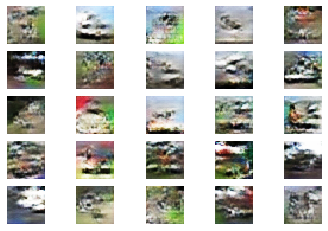

22 0.6514147 0.6554026 0.99206007
22 0.66766524 0.5563874 1.078423
22 0.63286555 0.52644736 1.0783764
22 0.6660197 0.53310776 1.0766172
22 0.5629214 0.5156024 1.1594065
22 0.65584326 0.5258313 0.9866049
22 0.72969306 0.6782843 0.974724
22 0.6674336 0.7061502 0.9335038
22 0.6226001 0.64018404 0.9590677
22 0.6906599 0.5754492 1.0217077
22 0.71247756 0.5899003 1.018471
22 0.6870961 0.583581 0.90543246
22 0.6764281 0.64118874 0.9095365
22 0.6455613 0.58321583 0.90961087
22 0.5881041 0.6436951 0.9368163
22 0.7437227 0.64315873 0.9197435
22 0.6303896 0.6169044 0.9245653
22 0.5873002 0.5676715 0.90538603
22 0.6617477 0.66365874 0.82857394
22 0.65400934 0.69004714 0.83162475
22 0.5449614 0.6672518 0.8350769
22 0.6811042 0.66720587 0.81878215
22 0.65300786 0.7538533 0.76935685
22 0.70044184 0.68083644 0.7949394
22 0.62436134 0.731547 0.8478339
22 0.62351865 0.69727397 0.824322
22 0.71853274 0.70160127 0.75796145
22 0.6788479 0.7052292 0.83448195
22 0.70071995 0.689744 0.8271532
22 0.6614311 0.7

22 0.66319084 0.58538663 0.82263917
22 0.62992114 0.6524178 0.8611767
22 0.6723267 0.6547901 0.8090736
22 0.5886711 0.6992823 0.7845346
22 0.6810882 0.6701815 0.8116251
22 0.7385077 0.66926545 0.821142
22 0.65287584 0.6924687 0.90115774
22 0.63730145 0.6859362 0.89989364
22 0.64419144 0.6383504 0.89573807
22 0.6272092 0.62602663 0.92622066
22 0.65001345 0.631302 0.93165195
22 0.6877217 0.6458851 0.88323814
22 0.6986957 0.68464035 0.8921715
22 0.60113007 0.6044631 0.9707761
22 0.6345861 0.6168494 0.9166089
22 0.6890055 0.67547804 0.82040507
22 0.64199024 0.5997496 0.82434857
22 0.6141728 0.6779386 0.8117515
22 0.6568017 0.65748954 0.77271724
22 0.63442755 0.7349125 0.844297
22 0.71177256 0.6388536 0.86493146
22 0.70792234 0.6667264 0.92606145
22 0.6952591 0.67637515 0.9491508
22 0.7822602 0.5936838 0.9807896
22 0.72676325 0.59772015 0.98594546
22 0.7767271 0.6482469 0.9557793
22 0.7510247 0.6167737 0.9351128
22 0.62636954 0.6035873 0.9300959
22 0.6422016 0.6101893 0.9865108
22 0.7103776

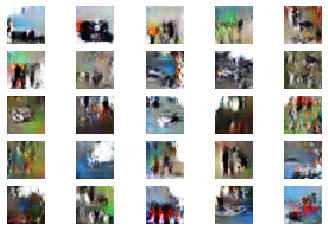

23 0.65618783 0.63455135 0.81884575
23 0.7058821 0.665465 0.9217062
23 0.6263567 0.5918635 0.98487264
23 0.74115485 0.5841423 0.98804796
23 0.6541637 0.6501471 0.98262835
23 0.59847105 0.5841944 0.91221195
23 0.6302013 0.6450125 0.90830755
23 0.66619354 0.6786462 0.86282885
23 0.65927136 0.7110374 0.83465683
23 0.67546314 0.65100694 0.95251524
23 0.6586695 0.58659816 1.0315542
23 0.6625196 0.6042177 0.9839735
23 0.74009705 0.6048214 1.0011382
23 0.5703516 0.6784712 0.9820261
23 0.6962228 0.60608786 0.9562496
23 0.6681663 0.6176319 0.7967358
23 0.6620995 0.6613333 0.83574635
23 0.7350093 0.7213127 0.80672216
23 0.6635174 0.7406732 0.81510276
23 0.6477166 0.6673392 0.8929174
23 0.74618113 0.6498113 0.87948126
23 0.72963345 0.627256 0.9237391
23 0.6798925 0.65067506 0.92846036
23 0.70037735 0.66664106 0.8687889
23 0.72966456 0.63980746 1.0470734
23 0.6839727 0.62353915 0.96476877
23 0.68960685 0.62124807 1.0336509
23 0.7034931 0.51822776 1.1428547
23 0.7450513 0.55708647 1.0472307
23 0.67

23 0.7305577 0.56540585 0.94901663
23 0.65795344 0.64611757 0.8636025
23 0.68443984 0.6471213 0.8708091
23 0.6967193 0.6520169 0.8534157
23 0.75933367 0.65207195 0.8769966
23 0.64409673 0.7010454 0.8849092
23 0.68533945 0.6394615 0.9089677
23 0.6573794 0.6604736 0.9038766
23 0.6150043 0.65783536 0.89440316
23 0.7645648 0.6938337 0.91366816
23 0.7036201 0.61763436 0.9487084
23 0.6637364 0.6727654 0.9390624
23 0.67515653 0.6185472 0.9007567
23 0.6708279 0.63699865 0.9063473
23 0.64002216 0.58799314 0.9269811
23 0.74211764 0.58933073 0.93834484
23 0.74094427 0.5726679 0.9093236
23 0.7001219 0.64355254 0.8722024
23 0.6572242 0.59154445 0.9057275
23 0.749895 0.6398648 0.8499795
23 0.64948356 0.6780399 0.8467961
23 0.6473845 0.6246921 0.8434861
23 0.67476934 0.6444672 0.90614426
23 0.6767498 0.64750516 0.9118811
23 0.67723715 0.646124 0.9494976
23 0.70391554 0.6183774 0.9179776
23 0.6583835 0.6464981 0.87393725
23 0.62815934 0.6617713 0.85734516
23 0.6638535 0.6287639 0.8930694
23 0.6087479 

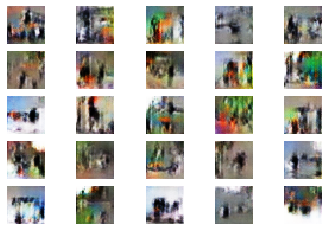

24 0.8287734 0.62370324 0.9002549
24 0.57916415 0.6081407 0.9079331
24 0.6545253 0.6919982 0.9462924
24 0.61135674 0.6318078 0.9345852
24 0.63618803 0.6600948 0.94206464
24 0.6356722 0.6220424 0.91448414
24 0.70743 0.6723455 0.8583659
24 0.5988638 0.65218514 0.868464
24 0.69966644 0.70666564 0.81707203
24 0.7117582 0.6767279 0.84050274
24 0.6803238 0.660252 0.87587035
24 0.6800326 0.63950527 0.84879
24 0.67950875 0.7419113 0.8637731
24 0.6737288 0.7495895 0.89484626
24 0.67840666 0.63622814 0.9486293
24 0.7267826 0.63794434 0.9907334
24 0.7354558 0.5517668 0.96137977
24 0.7170636 0.5926934 0.9520585
24 0.6763337 0.60012317 1.1264901
24 0.73351246 0.54743755 1.0520185
24 0.6411737 0.5839072 1.0765226
24 0.7370079 0.5313951 0.9651391
24 0.66125095 0.5305693 0.97818875
24 0.6113919 0.63904345 0.9132626
24 0.7033943 0.61872184 0.94122595
24 0.64306337 0.63588065 0.9722778
24 0.67377096 0.6639818 0.9196895
24 0.6808744 0.64580834 0.9604127
24 0.6727605 0.643057 0.9607841
24 0.73554087 0.676

24 0.6851053 0.594213 0.93341875
24 0.67589176 0.67913866 0.87945545
24 0.62485355 0.69014335 0.86034036
24 0.5792968 0.6123526 0.8512502
24 0.62869716 0.6085981 0.87183744
24 0.7001991 0.5997095 0.8938821
24 0.7255493 0.6585257 0.9025476
24 0.576048 0.5749812 0.9185865
24 0.6418992 0.7017425 0.864096
24 0.6977723 0.6431514 0.87234396
24 0.6187848 0.69621205 0.8449564
24 0.66718495 0.6385181 0.8890641
24 0.7522028 0.6588305 0.8170017
24 0.71470535 0.6791844 0.8171997
24 0.6730443 0.69301564 0.8209288
24 0.7030362 0.67485356 0.77779704
24 0.64868855 0.66478086 0.819763
24 0.6628428 0.71206725 0.86066246
24 0.6945003 0.6324654 0.82892185
24 0.6663265 0.62271166 0.9028504
24 0.6698638 0.6241765 0.93970543
24 0.6588199 0.59703815 0.9028715
24 0.6814199 0.63891226 0.9368718
24 0.6649996 0.5903879 0.9688201
24 0.7149765 0.6132494 1.0115291
24 0.68194616 0.58219576 0.96699655
24 0.596854 0.5612718 1.0252875
24 0.65681714 0.6178565 0.8637577
24 0.62827045 0.5773556 0.91510534
24 0.5790159 0.68

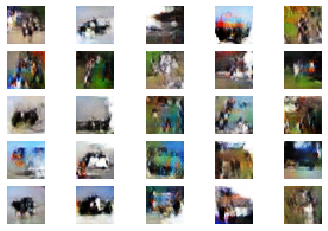

25 0.6581173 0.6527191 0.88048184
25 0.6115589 0.65502524 0.8682208
25 0.6947972 0.7122676 0.8564827
25 0.6177706 0.7138089 0.84356093
25 0.7228042 0.6799133 0.80218375
25 0.66998744 0.7003565 0.76662385
25 0.6154766 0.7228414 0.8720237
25 0.7008672 0.6655978 0.9257308
25 0.65411985 0.6266068 0.9514738
25 0.67115504 0.6012048 0.9953734
25 0.7161539 0.58110917 0.97549176
25 0.6757196 0.5944687 0.9464896
25 0.6275312 0.61651415 0.8569436
25 0.6137676 0.6666131 0.8766161
25 0.7084267 0.6314794 0.91607696
25 0.6351919 0.64616686 0.88634706
25 0.65893275 0.72451526 0.9161038
25 0.63272554 0.72424966 0.8351926
25 0.76219964 0.606092 0.79724604
25 0.7702699 0.6835406 0.8471221
25 0.6595209 0.6683646 0.8417653
25 0.71413505 0.6984268 0.8634877
25 0.6953801 0.6181785 0.8695032
25 0.7287725 0.5926868 0.8839034
25 0.70782036 0.71525437 0.8609402
25 0.67224336 0.65308094 0.9276017
25 0.73534775 0.6601997 0.99545527
25 0.7596085 0.629681 0.8962641
25 0.6673827 0.6934507 0.8754182
25 0.6701825 0.663

25 0.6816302 0.6365887 0.84969103
25 0.7446424 0.6630374 0.87954855
25 0.6824181 0.6020215 0.919853
25 0.69552183 0.6517769 0.8748916
25 0.7697166 0.6407115 0.7795022
25 0.7422434 0.7009177 0.798376
25 0.6779491 0.6138766 0.84227073
25 0.6674135 0.67225385 0.8129866
25 0.615929 0.6339222 0.88224673
25 0.6484737 0.61353105 0.8840879
25 0.68331814 0.65329146 0.83015394
25 0.6780901 0.6809981 0.81788534
25 0.689916 0.6593854 0.86049867
25 0.7755142 0.6715796 0.8583248
25 0.7250638 0.6362966 0.8898877
25 0.7830131 0.66365016 0.8469903
25 0.7050953 0.6253302 0.87365395
25 0.668074 0.6839713 0.8401803
25 0.6211993 0.6036048 0.87923455
25 0.61454403 0.6018975 0.88786477
25 0.72040665 0.6736595 0.8364964
25 0.7024811 0.6510601 0.863393
25 0.6198274 0.6945756 0.87462896
25 0.66672015 0.6385379 0.84932435
25 0.6612968 0.63142943 0.9444597
25 0.70695865 0.61658204 0.898995
25 0.6724105 0.6534123 0.8260839
25 0.70942116 0.7331115 0.8014941
25 0.6819109 0.7024716 0.8193187
25 0.60672885 0.63095415 

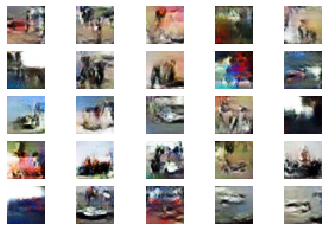

26 0.80887043 0.6540687 0.88455
26 0.70943725 0.6031494 0.8621124
26 0.7010793 0.6555992 0.8515239
26 0.6837131 0.64978004 0.85045344
26 0.7173303 0.6602217 0.83795774
26 0.60248786 0.6681948 0.8445279
26 0.6799811 0.7869755 0.7825496
26 0.689299 0.67489743 0.8364433
26 0.6647178 0.63100255 0.98767567
26 0.7501997 0.623811 0.9657147
26 0.6629105 0.69634026 0.89675355
26 0.6587726 0.6845503 0.8656926
26 0.64664197 0.63951874 0.8502902
26 0.6821171 0.6960014 0.8173497
26 0.6496483 0.6788437 0.8730836
26 0.70553195 0.6736091 0.905908
26 0.6843941 0.6347612 0.88524413
26 0.6880853 0.6771593 0.8831712
26 0.6628933 0.6555723 0.87964135
26 0.7380397 0.67289966 0.8529409
26 0.71477795 0.68300366 0.878162
26 0.64507145 0.65422416 0.8812536
26 0.62572885 0.6224624 0.92352986
26 0.70593953 0.62266517 0.88233536
26 0.64744604 0.63782334 0.8849062
26 0.72897285 0.63597155 0.831283
26 0.7155162 0.5912343 0.8147689
26 0.73840797 0.7137831 0.775856
26 0.63315547 0.7036041 0.76772755
26 0.67451084 0.77

26 0.6258661 0.7092445 0.81356514
26 0.66374266 0.6515516 0.8719045
26 0.6823875 0.6852236 0.8654907
26 0.65353906 0.58970106 0.85698336
26 0.7027732 0.62688553 0.79662883
26 0.653126 0.674711 0.8336404
26 0.64575183 0.7541134 0.76689786
26 0.611429 0.67076933 0.8043052
26 0.7022502 0.71167016 0.80943084
26 0.69435704 0.61112833 0.79824525
26 0.6938568 0.6838167 0.75137836
26 0.67430305 0.68952227 0.7711095
26 0.66518956 0.78171504 0.801939
26 0.64743525 0.66186464 0.82987154
26 0.7137005 0.6240728 0.8422639
26 0.6885859 0.69549304 0.8279573
26 0.7354589 0.6946535 0.80424404
26 0.67150736 0.6631977 0.7913666
26 0.6951722 0.6735256 0.8457923
26 0.70891696 0.6653987 0.8369014
26 0.6987948 0.6639149 0.77577794
26 0.7176331 0.6942935 0.7866344
26 0.6959117 0.6571188 0.80835295
26 0.6779038 0.65979135 0.83329386
26 0.6521753 0.6860042 0.81262237
26 0.70097506 0.67773664 0.83104014
26 0.7036903 0.6355689 0.88292515
26 0.67125154 0.6693028 0.84669006
26 0.7019603 0.59939396 0.85282564
26 0.64

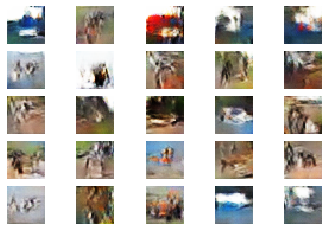

27 0.64659536 0.6859151 0.77889085
27 0.65775573 0.68424255 0.80124176
27 0.6995992 0.65161186 0.8439727
27 0.67329574 0.67353094 0.8267362
27 0.68694866 0.63259166 0.84495294
27 0.73947453 0.6540397 0.8351051
27 0.6719807 0.6900784 0.82138824
27 0.67308784 0.673935 0.8139396
27 0.61798066 0.68612504 0.77821934
27 0.6632607 0.6640165 0.81144506
27 0.7100649 0.6924724 0.7904761
27 0.6669869 0.71888745 0.7797375
27 0.6616203 0.6641704 0.7991042
27 0.7405212 0.68017685 0.77389276
27 0.65391326 0.6839593 0.769756
27 0.6793364 0.6961503 0.7977184
27 0.6188732 0.7083231 0.8153048
27 0.721545 0.65268815 0.86555684
27 0.6928787 0.66681695 0.87906003
27 0.71268755 0.69801885 0.8313693
27 0.6643475 0.6558063 0.87197465
27 0.6895696 0.70773387 0.8095932
27 0.6595282 0.6692608 0.85211986
27 0.780323 0.6704355 0.84113145
27 0.7362631 0.6592847 0.796714
27 0.7164328 0.66538644 0.84643596
27 0.7926187 0.65571487 0.81058407
27 0.6892815 0.7107165 0.82645845
27 0.69359195 0.6547505 0.84233564
27 0.7098

27 0.69395804 0.63428897 0.8984187
27 0.7273704 0.69459045 0.80917954
27 0.66719687 0.7288048 0.8083259
27 0.73801947 0.6693996 0.7887234
27 0.71255076 0.663314 0.81083226
27 0.70545506 0.68830585 0.7955626
27 0.7009383 0.6468105 0.7951517
27 0.7091888 0.70204186 0.80467975
27 0.6842426 0.65304714 0.78104687
27 0.7266719 0.71041214 0.8075619
27 0.73357964 0.68387425 0.8246506
27 0.66789925 0.6731003 0.85238016
27 0.65933144 0.6155062 0.79932195
27 0.6660645 0.7090203 0.79256314
27 0.6894919 0.6330391 0.8076832
27 0.7221657 0.68773186 0.7956727
27 0.7038951 0.7215021 0.81163853
27 0.68995726 0.67015165 0.8373028
27 0.7165924 0.68148804 0.8088793
27 0.6665099 0.6467762 0.8083342
27 0.7101784 0.68225634 0.8218146
27 0.73896384 0.69123274 0.8048115
27 0.6556648 0.641645 0.83702326
27 0.72411 0.6380959 0.7514243
27 0.67245775 0.73073447 0.75860655
27 0.703902 0.6843922 0.8074213
27 0.63739556 0.73019904 0.7775301
27 0.6987965 0.69558185 0.831495
27 0.6529635 0.64858854 0.92897236
27 0.78146

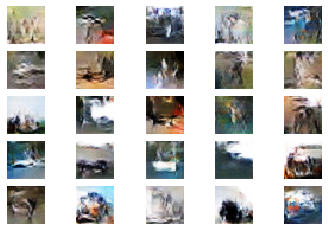

28 0.6834153 0.7385753 0.78185505
28 0.7009261 0.6638776 0.86891156
28 0.72822475 0.7216406 0.8592017
28 0.72175914 0.62686783 0.86582047
28 0.6591099 0.6679263 0.8517765
28 0.6815606 0.65626645 0.81470275
28 0.6615795 0.6520934 0.7920823
28 0.6953564 0.6571367 0.8001604
28 0.6347256 0.70318526 0.79757494
28 0.6921578 0.70532537 0.7898782
28 0.6743833 0.62828165 0.78074706
28 0.6680442 0.67078364 0.78833467
28 0.66669273 0.6723715 0.8246281
28 0.6451513 0.6884217 0.75720567
28 0.68586046 0.70967966 0.77581763
28 0.7077938 0.6635646 0.7934978
28 0.66766524 0.69685197 0.8098881
28 0.6632915 0.6675644 0.83168244
28 0.71729743 0.6666512 0.7956213
28 0.70453835 0.68345726 0.8166412
28 0.6570232 0.6971157 0.831533
28 0.6939999 0.68063813 0.78718066
28 0.68485034 0.6849388 0.7995319
28 0.6279845 0.67551005 0.7583618
28 0.7268843 0.68278456 0.7681537
28 0.67601806 0.6289209 0.7696759
28 0.67952555 0.6701274 0.81314623
28 0.68289375 0.7086596 0.85445035
28 0.68952954 0.6286945 0.81206733
28 0.6

28 0.73549044 0.63016415 0.8329383
28 0.6412684 0.63300705 0.84815234
28 0.66468734 0.62810194 0.8223475
28 0.69707805 0.64042795 0.79152906
28 0.6700454 0.74996626 0.76108366
28 0.69093657 0.71126175 0.7638558
28 0.6953989 0.70281565 0.7594463
28 0.717248 0.7322036 0.7339116
28 0.6330412 0.683942 0.75178504
28 0.68052626 0.69443524 0.80437076
28 0.6757163 0.7074642 0.7961333
28 0.74920595 0.64333916 0.76389277
28 0.67750174 0.7146689 0.76286393
28 0.64378285 0.6919881 0.79994065
28 0.658853 0.6928724 0.81814283
28 0.73388636 0.69897056 0.82336503
28 0.72432554 0.6409774 0.813885
28 0.67841274 0.69227874 0.7997258
28 0.6432207 0.67538714 0.8306693
28 0.74225205 0.6308952 0.7963152
28 0.73917425 0.63317317 0.8113763
28 0.734313 0.6615964 0.7666762
28 0.68537366 0.6188532 0.81389225
28 0.665959 0.6728907 0.80718946
28 0.68117356 0.69889975 0.75047094
28 0.7149155 0.71368515 0.7757277
28 0.6416838 0.638477 0.8446222
28 0.7281805 0.70627034 0.81965137
28 0.69026923 0.6549944 0.79030854
28 

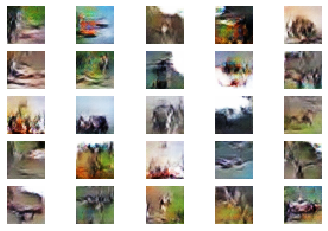

29 0.73399866 0.64914787 0.8231355
29 0.7115736 0.6963295 0.8212772
29 0.7198204 0.68798137 0.7822968
29 0.70250267 0.68628925 0.7710658
29 0.69419783 0.6617043 0.77719504
29 0.6502772 0.64411354 0.755251
29 0.6516228 0.7029886 0.80371296
29 0.6657226 0.68747795 0.7764149
29 0.62843454 0.6360733 0.77273184
29 0.69272846 0.71661127 0.80713016
29 0.6441225 0.7302269 0.80552757
29 0.6089234 0.69710934 0.8048685
29 0.6918792 0.67086387 0.8146728
29 0.6706024 0.7554954 0.8013058
29 0.6635307 0.7140201 0.83499706
29 0.72279674 0.6631535 0.7602515
29 0.6993911 0.71767116 0.75846446
29 0.71037626 0.6759778 0.78648984
29 0.70807946 0.63102055 0.77066636
29 0.68552643 0.67555654 0.78950334
29 0.70581055 0.6935035 0.7822951
29 0.6918927 0.6638349 0.7887591
29 0.68767744 0.69836557 0.83404225
29 0.6895795 0.67712754 0.8309035
29 0.75995725 0.65039784 0.832453
29 0.69069976 0.6405774 0.83526194
29 0.72635734 0.66100705 0.84457743
29 0.7226577 0.67318547 0.8139055
29 0.70647883 0.6272583 0.88604367


29 0.677989 0.63611114 0.805233
29 0.7218178 0.6251075 0.7685242
29 0.7141577 0.6385836 0.7378819
29 0.5981122 0.661321 0.743504
29 0.7067182 0.7233874 0.74386334
29 0.6436211 0.6958314 0.74989885
29 0.6955478 0.73572856 0.7947931
29 0.67919934 0.67806065 0.8624631
29 0.7004733 0.59633 0.9170171
29 0.69401526 0.56669295 0.95743316
29 0.6866623 0.5744411 0.96321726
29 0.6796584 0.5898267 0.93357867
29 0.6315274 0.62056774 0.9411855
29 0.67972565 0.6313036 0.78271055
29 0.6135331 0.62966645 0.75041175
29 0.7657709 0.6379572 0.63690656
29 0.6752834 0.73672163 0.649892
29 0.7009946 0.68426585 0.657841
29 0.6522644 0.7740232 0.7216871
29 0.60052854 0.7326982 0.79870397
29 0.6665381 0.74481803 0.8248038
29 0.6354454 0.6722758 0.98553014
29 0.66418076 0.6549765 0.97113067
29 0.6130723 0.69770676 1.0000043
29 0.65248734 0.6690707 0.86257905
29 0.6541492 0.67063916 0.78984356
29 0.6752645 0.7151156 0.7880521
29 0.66837895 0.69180447 0.7905014
29 0.6507505 0.7082492 0.83205044
29 0.6671997 0.687

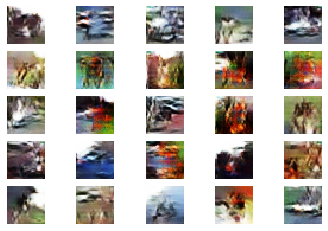

EPOCH: 0


In [5]:
train(g_model, d_model, gan_model, dataset, latent_dim, callback, 30, 128, 'generator_cifar_batch_norm.h5')

In [3]:
%load_ext tensorboard
%tensorboard --logdir logs

In [2]:
from tensorflow.keras.models import load_model
from src.models.train_helpers import generate_image_show

# load model
model = load_model('../models/generator_cifar_batch_norm.h5', compile=False)

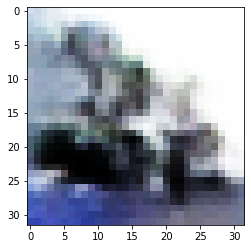

In [16]:
generate_image_show(model,100,9);